
## Mining Tweets

In [1]:
from social_miner.twitter import read_tweets, dump_tweets
import pandas as pd

In [2]:
lv_tweets = read_tweets("LouisVuitton", limit=10)
len(lv_tweets)

10

### Exploring Tweets

In [3]:
lv_tweets[0].keys()

dict_keys(['_id', 'text', 'id', 'created_at', 'public_metrics', 'user_metrics', 'retweeters'])

### Normalización de Tweets

In [4]:
tweets_columns = ["id", "text", "user_metrics", "public_metrics", "created_at"]

tweets_data = [{k: t[k] for k in tweets_columns} for t in lv_tweets]

tweets_df = pd.json_normalize(tweets_data).rename(columns={"id": "tweet_id"})
tweets_df.head(1)

,tweet_id,text,created_at,user_metrics.followers_count,user_metrics.following_count,user_metrics.tweet_count,user_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
0,1491396464450355207,A mingle of tradition and modernity. Gathered ...,2022-02-09 13:00:00,9263006,5,7045,10151,34,2,626,2


In [5]:
retweeters_columns = ["id", "retweeters"]

retweets_data = [{k: t[k] for k in retweeters_columns} for t in lv_tweets]

retweets_df = pd.DataFrame()

for t in retweets_data:
    r_df = pd.json_normalize(t["retweeters"]).rename(columns={"id": "user_id"})
    columns = list(r_df.columns)
    r_df["tweet_id"] = t["id"]
    r_df = r_df[["tweet_id"]+columns]
    retweets_df = retweets_df.append(r_df)

retweets_df.head(10)

,tweet_id,username,verified,name,user_id,description,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,entities.description.urls,entities.description.hashtags,entities.url.urls,entities.description.mentions
0,1491396464450355207,TAKISHITAMICHI1,False,MICHIAKI,1113025524597612544,https://t.co/xaItcEcaWf,234,230,1203,1,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN,NaN,NaN
1,1491396464450355207,vlaNascimento,False,@VLN.,1439952679376150534,"Designer ✍:/Comentários (Moda, Beleza,Celebrid...",20,450,821,0,NaN,NaN,NaN,NaN
2,1491396464450355207,jessy_Annis,False,Jessy Annisa,1474059456434491405,Real estate and sales of medical equipment com...,57,48,167,0,NaN,"[{'start': 105, 'end': 112, 'tag': 'Thanks'}]",NaN,NaN
3,1491396464450355207,Lylasmom10,False,AnastaciaMarie Combs,205997028,,1919,3643,16535,8,NaN,NaN,NaN,NaN
4,1491396464450355207,LVMH,True,LVMH,558606074,Official account of the LVMH Group | World lea...,172787,56,16415,1206,NaN,NaN,"[{'start': 0, 'end': 23, 'url': 'https://t.co/...",NaN
5,1491396464450355207,cocoa_key,False,ライトくん🌬🌙,516817944,『君を守る光になる』 I'm from fust for you ain dreams / ...,910,2229,210767,132,NaN,NaN,NaN,NaN
6,1491396464450355207,Theoldmc1,False,Theoldmc,1078535006035689473,I'm just a fan. 🇵🇭\n#Fanpage #kpop #Ppop #Mult...,110,223,307645,1,NaN,"[{'start': 19, 'end': 27, 'tag': 'Fanpage'}, {...",NaN,NaN
7,1491396464450355207,ayaya619,False,あやや,239007356,ジャニーズ大好き,20,77,616,0,NaN,NaN,NaN,NaN
8,1491396464450355207,ro64lima,False,dada,774262359057719296,Only Army 💜 Just for U BTS\n 🇰🇷( ◜‿◝ )♡🇧🇷,1803,2020,40125,22,NaN,NaN,NaN,NaN
9,1491396464450355207,Mvura_mvur,False,Mvura,1446117089631113287,lexusgatavia on Instagram.,21,55,184,0,NaN,NaN,NaN,NaN


In [6]:
from social_miner.pipeline import (
    preprocess_and_tokenize,
    extract_hashtags,
    tag_tokens,
    extract_keywords,
    extract_noun_phrases,
    processing_pipeline
)

In [7]:
tweets_df["hashtags"] = tweets_df["text"].apply(
    lambda x: extract_hashtags(x)
)
tweets_df["hashtags"]

0                            [LouisVuitton]
1                            [LouisVuitton]
2                            [LouisVuitton]
3                    [LouisVuitton, LVVolt]
4                    [LouisVuitton, LVVolt]
5                    [LouisVuitton, LVVolt]
6                    [LouisVuitton, LVVolt]
7                    [LouisVuitton, LVVolt]
8                    [LouisVuitton, LVVolt]
9    [LouisVuitton, VirgilAbloh, TimWalker]
Name: hashtags, dtype: object

In [8]:
import googletrans
tr = googletrans.Translator()

tweets_df["translated_text"] = tweets_df["text"].apply(
    lambda x: tr.translate(x).text
)

In [9]:
tweets_df["translated_text"]

0    A mingle of tradition and modernity. Gathered ...
1    A welcoming surprise. In the perfectly manicur...
2    A showcase of creativity and expertise. #Louis...
3    Powerful forms. The #LVVolt Fine Jewelry Colle...
4    Graphic abstractions. The #LVVolt Fine Jewelry...
5    Iconic initials. The #LVVolt Collection speaks...
6    Feel the rhythm. The #LVVolt Fine Jewelry Coll...
7    Turn up the volume. #LouisVuitton’s new Upside...
8    Vital energy. A new chapter opens in the #LVVo...
9    Collective re-contextualization. After its cin...
Name: translated_text, dtype: object

In [10]:
tweets_df["preprocessed"] = tweets_df["translated_text"].apply(
    lambda x: preprocess_and_tokenize(x)
)
tweets_df["preprocessed"]

0    [a, mingle, of, tradition, and, modernity, gat...
1    [a, welcoming, surprise, in, the, perfectly, m...
2    [a, showcase, of, creativity, and, expertise, ...
3    [powerful, forms, the, lvvolt, fine, jewelry, ...
4    [graphic, abstractions, the, lvvolt, fine, jew...
5    [iconic, initials, the, lvvolt, collection, sp...
6    [feel, the, rhythm, the, lvvolt, fine, jewelry...
7    [turn, up, the, volume, louisvuittons, new, up...
8    [vital, energy, a, new, chapter, opens, in, th...
9    [collective, recontextualization, after, its, ...
Name: preprocessed, dtype: object

In [11]:
tweets_df["tagged"] = tweets_df["preprocessed"].apply(
    lambda x: tag_tokens(x)
)
tweets_df["tagged"]

0    [(a, DT), (mingle, NN), (of, IN), (tradition, ...
1    [(a, DT), (welcoming, VBG), (surprise, NN), (i...
2    [(a, DT), (showcase, NN), (of, IN), (creativit...
3    [(powerful, JJ), (forms, NNS), (the, DT), (lvv...
4    [(graphic, JJ), (abstractions, NNS), (the, DT)...
5    [(iconic, JJ), (initials, NNS), (the, DT), (lv...
6    [(feel, VB), (the, DT), (rhythm, NN), (the, DT...
7    [(turn, VB), (up, RP), (the, DT), (volume, NN)...
8    [(vital, JJ), (energy, NN), (a, DT), (new, JJ)...
9    [(collective, JJ), (recontextualization, NN), ...
Name: tagged, dtype: object

In [12]:
tweets_df["keywords"] = tweets_df["tagged"].apply(
    lambda x: extract_keywords(x)
)
tweets_df["keywords"]

0    [mingle, tradition, modernity, majestic, châte...
1    [surprise, gardens, château, voisins, louisvui...
2    [showcase, creativity, expertise, louisvuitton...
3    [powerful, forms, lvvolt, fine, jewelry, colle...
4    [graphic, abstractions, lvvolt, fine, jewelry,...
5    [iconic, initials, lvvolt, collection, univers...
6    [rhythm, lvvolt, fine, jewelry, collection, sp...
7    [volume, new, bracelet, sculptural, lv, clasp,...
8    [vital, energy, new, chapter, lvvolt, collecti...
9    [collective, recontextualization, cinematic, p...
Name: keywords, dtype: object

In [13]:
tweets_df["noun_phrases"] = tweets_df["tagged"].apply(
    lambda x: extract_noun_phrases(x)
)
tweets_df["noun_phrases"]

0    [a mingle, the majestic château, the ingenious...
1           [the château, the extent, the savoirfaire]
2    [a showcase, a collection, the extraordinary s...
3    [the lvvolt fine jewelry, the energy, energeti...
4    [the lvvolt fine jewelry, a universal language...
5    [the lvvolt, a universal language, pink gold, ...
6    [the rhythm, the lvvolt fine jewelry, a unit, ...
7    [the volume, a sculptural lv, a colorful array...
8    [vital energy, a new chapter, the lvvolt colle...
9    [collective recontextualization, cinematic pre...
Name: noun_phrases, dtype: object

In [14]:
tweets_df

,tweet_id,text,created_at,user_metrics.followers_count,user_metrics.following_count,user_metrics.tweet_count,user_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,hashtags,translated_text,preprocessed,tagged,keywords,noun_phrases
0,1491396464450355207,A mingle of tradition and modernity. Gathered ...,2022-02-09 13:00:00,9263006,5,7045,10151,34,2,626,2,[LouisVuitton],A mingle of tradition and modernity. Gathered ...,"[a, mingle, of, tradition, and, modernity, gat...","[(a, DT), (mingle, NN), (of, IN), (tradition, ...","[mingle, tradition, modernity, majestic, châte...","[a mingle, the majestic château, the ingenious..."
1,1491336076128100356,A welcoming surprise. In the perfectly manicur...,2022-02-09 09:00:02,9263006,5,7045,10151,42,1,552,1,[LouisVuitton],A welcoming surprise. In the perfectly manicur...,"[a, welcoming, surprise, in, the, perfectly, m...","[(a, DT), (welcoming, VBG), (surprise, NN), (i...","[surprise, gardens, château, voisins, louisvui...","[the château, the extent, the savoirfaire]"
2,1491071823873671169,A showcase of creativity and expertise. #Louis...,2022-02-08 15:30:00,9263006,5,7045,10151,77,11,1128,2,[LouisVuitton],A showcase of creativity and expertise. #Louis...,"[a, showcase, of, creativity, and, expertise, ...","[(a, DT), (showcase, NN), (of, IN), (creativit...","[showcase, creativity, expertise, louisvuitton...","[a showcase, a collection, the extraordinary s..."
3,1490415013668044809,Powerful forms. The #LVVolt Fine Jewelry Colle...,2022-02-06 20:00:04,9263006,5,7045,10151,93,10,1490,9,"[LouisVuitton, LVVolt]",Powerful forms. The #LVVolt Fine Jewelry Colle...,"[powerful, forms, the, lvvolt, fine, jewelry, ...","[(powerful, JJ), (forms, NNS), (the, DT), (lvv...","[powerful, forms, lvvolt, fine, jewelry, colle...","[the lvvolt fine jewelry, the energy, energeti..."
4,1490233847555973125,Graphic abstractions. The #LVVolt Fine Jewelry...,2022-02-06 08:00:11,9263006,5,7045,10151,71,11,1138,4,"[LouisVuitton, LVVolt]",Graphic abstractions. The #LVVolt Fine Jewelry...,"[graphic, abstractions, the, lvvolt, fine, jew...","[(graphic, JJ), (abstractions, NNS), (the, DT)...","[graphic, abstractions, lvvolt, fine, jewelry,...","[the lvvolt fine jewelry, a universal language..."
5,1490052616289767430,Iconic initials. The #LVVolt Collection speaks...,2022-02-05 20:00:02,9263006,5,7045,10151,92,7,1688,9,"[LouisVuitton, LVVolt]",Iconic initials. The #LVVolt Collection speaks...,"[iconic, initials, the, lvvolt, collection, sp...","[(iconic, JJ), (initials, NNS), (the, DT), (lv...","[iconic, initials, lvvolt, collection, univers...","[the lvvolt, a universal language, pink gold, ..."
6,1489871451477979139,Feel the rhythm. The #LVVolt Fine Jewelry Coll...,2022-02-05 08:00:09,9263006,5,7045,10151,86,14,1184,8,"[LouisVuitton, LVVolt]",Feel the rhythm. The #LVVolt Fine Jewelry Coll...,"[feel, the, rhythm, the, lvvolt, fine, jewelry...","[(feel, VB), (the, DT), (rhythm, NN), (the, DT...","[rhythm, lvvolt, fine, jewelry, collection, sp...","[the rhythm, the lvvolt fine jewelry, a unit, ..."
7,1489690235709669388,Turn up the volume. #LouisVuitton’s new Upside...,2022-02-04 20:00:03,9263006,5,7045,10151,114,16,1586,13,"[LouisVuitton, LVVolt]",Turn up the volume. #LouisVuitton’s new Upside...,"[turn, up, the, volume, louisvuittons, new, up...","[(turn, VB), (up, RP), (the, DT), (volume, NN)...","[volume, new, bracelet, sculptural, lv, clasp,...","[the volume, a sculptural lv, a colorful array..."
8,1489509083539550210,Vital energy. A new chapter opens in the #LVVo...,2022-02-04 08:00:13,9263006,5,7045,10151,65,6,983,9,"[LouisVuitton, LVVolt]",Vital energy. A new chapter opens in the #LVVo...,"[vital, energy, a, new, chapter, opens, in, th...","[(vital, JJ), (energy, NN), (a, DT), (new, JJ)...","[vital, energy, new, chapter, lvvolt, collecti...","[vital energy, a new chapter, the lvvolt colle..."
9,1489252338707533833,Collective re-contextualizat

In [15]:


from social_miner.pipeline import generate_wordcloud

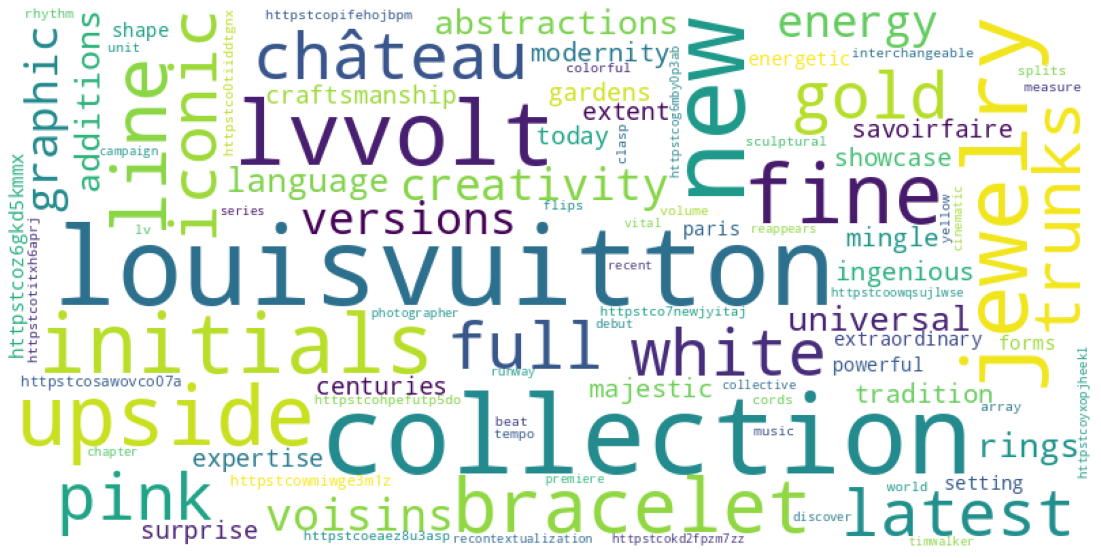

In [16]:
wc = generate_wordcloud(tweets_df, "keywords", collocations=False)

In [17]:
wc.words_

{'louisvuitton': 1.0,
 'collection': 1.0,
 'new': 0.8888888888888888,
 'lvvolt': 0.6666666666666666,
 'jewelry': 0.6666666666666666,
 'fine': 0.5555555555555556,
 'initials': 0.5555555555555556,
 'upside': 0.5555555555555556,
 'line': 0.4444444444444444,
 'bracelet': 0.4444444444444444,
 'château': 0.3333333333333333,
 'trunks': 0.3333333333333333,
 'full': 0.3333333333333333,
 'white': 0.3333333333333333,
 'pink': 0.3333333333333333,
 'gold': 0.3333333333333333,
 'iconic': 0.3333333333333333,
 'latest': 0.3333333333333333,
 'creativity': 0.2222222222222222,
 'voisins': 0.2222222222222222,
 'energy': 0.2222222222222222,
 'versions': 0.2222222222222222,
 'graphic': 0.2222222222222222,
 'abstractions': 0.2222222222222222,
 'universal': 0.2222222222222222,
 'language': 0.2222222222222222,
 'rings': 0.2222222222222222,
 'additions': 0.2222222222222222,
 'mingle': 0.1111111111111111,
 'tradition': 0.1111111111111111,
 'modernity': 0.1111111111111111,
 'majestic': 0.1111111111111111,
 'ingen

### 🤔  Make a count of keywords and pick up the top 20

In [18]:
####

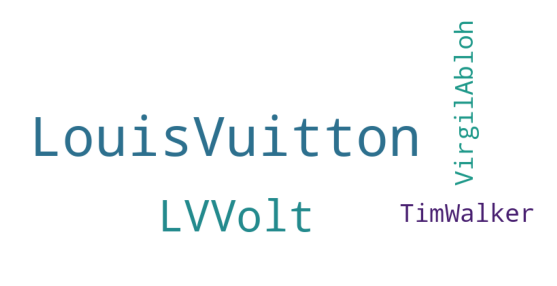

In [19]:
wc = generate_wordcloud(tweets_df, "hashtags", figsize=(10,5))

### 🤔  Make a count of hashtags and pick up the top 20

In [20]:
from social_miner.pipeline import get_verbatims

In [21]:
get_verbatims(tweets_df, text_col="text", keyword="Louis", n=5)

['A mingle of tradition and modernity. Gathered at  the majestic Château de Voisins, the ingenious creativity and craftsmanship of #LouisVuitton’s hard-sided trunks are showcased.',
 'A welcoming surprise. In the perfectly manicured gardens of the Château de Voisins, #LouisVuitton’s hard-sided trunks reveal the extent of the savoir-faire that has continued throughout the centuries until today.',
 'A showcase of creativity and expertise. #LouisVuitton presents a collection of trunks in the extraordinary setting of the Château de Voisins near Paris.',
 'Powerful forms. The #LVVolt Fine Jewelry Collection pulsates with the energy of #LouisVuitton’s initials’ energetic shape. Discover the full line including new white and pink gold versions of the Upside Down bracelet at https://t.co/Z6gKD5KMMx https://t.co/SAWOVCO07a',
 'Graphic abstractions. The #LVVolt Fine Jewelry Collection creates a universal language out of #LouisVuitton’s iconic initials. Discover the full line including new white 

### Sintagmas nominales

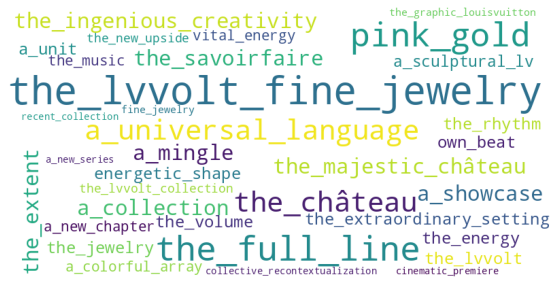

In [22]:
wc = generate_wordcloud(tweets_df, "noun_phrases", figsize=(10,5))

### 🤔 Detecting trends in time series

In [23]:
tweets_df["created_at"].iloc[0]

Timestamp('2022-02-09 13:00:00')

In [24]:
tweets_ts = tweets_df.set_index(["created_at"])
tweets_ts.head(1)

,tweet_id,text,user_metrics.followers_count,user_metrics.following_count,user_metrics.tweet_count,user_metrics.listed_count,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,hashtags,translated_text,preprocessed,tagged,keywords,noun_phrases
created_at,,,,,,,,,,,,,,,,
2022-02-09 13:00:00,1491396464450355207,A mingle of tradition and modernity. Gathered ...,9263006,5,7045,10151,34,2,626,2,[LouisVuitton],A mingle of tradition and modernity. Gathered ...,"[a, mingle, of, tradition, and, modernity, gat...","[(a, DT), (mingle, NN), (of, IN), (tradition, ...","[mingle, tradition, modernity, majestic, châte...","[a mingle, the majestic château, the ingenious..."


In [25]:
import numpy as np 
metrics_cols = [c for c in list(tweets_df.columns) if "public_metrics" in c]

dt = tweets_ts[metrics_cols].rename(
    columns={
        c: c.replace("public_metrics.", "") for c in metrics_cols
    }
)

dt["n_tweets"] = 1

dt = dt.resample("D").sum().reset_index().rename(
    columns={"created_at": "date"}
)
dt.head(1)

,date,retweet_count,reply_count,like_count,quote_count,n_tweets
0,2022-02-03,61,8,988,3,1


In [26]:
dt[list(dt.columns)[1:]] += 1

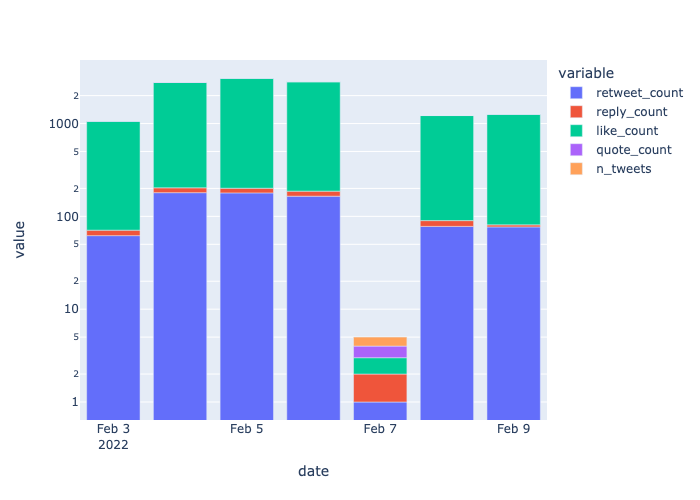

In [27]:
import plotly.express as px

fig = px.bar(
    dt,
    x="date",
    y=list(dt.columns)[1:],
    log_y=True
)
fig.show("png")

## Mining Facebook Posts

In [28]:
from social_miner.facebook import read_posts, dump_posts

In [29]:
lv_posts = read_posts(account="LouisVuitton", limit=10)

In [30]:
lv_posts[0].keys()

dict_keys(['_id', 'text', 'post_text', 'shared_text', 'time', 'timestamp', 'image', 'image_lowquality', 'images', 'images_description', 'images_lowquality', 'images_lowquality_description', 'video', 'video_duration_seconds', 'video_height', 'video_id', 'video_quality', 'video_size_MB', 'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments', 'shares', 'post_url', 'link', 'links', 'user_id', 'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 'available', 'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count', 'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live'])